In [29]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as sco

In [30]:
stocks=['AAPL','WMT','TSLA','GE','AMZN','DB']

In [31]:
s_dt='01/01/2001'
e_dt='20/11/2019'

In [32]:
data=web.DataReader(stocks,data_source='yahoo',start=s_dt,end=e_dt)['Adj Close']

In [33]:
data

Symbols,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2001-01-02,0.924482,37.753437,NaN,23.312727,13.875000,53.343246
2001-01-03,1.017707,40.950653,NaN,25.477486,17.562500,53.915058
2001-01-04,1.060436,39.373932,NaN,25.610699,15.500000,57.100941
2001-01-05,1.017707,37.797234,NaN,25.211050,14.562500,56.937572
2001-01-08,1.029361,37.797234,NaN,24.278542,14.937500,56.038982
...,...,...,...,...,...,...
2019-11-14,262.640015,120.650002,349.350006,11.290000,1754.599976,7.210000
2019-11-15,265.760010,118.870003,352.170013,11.520000,1739.489990,7.310000
2019-11-18,267.100006,120.250000,349.989990,11.440000,1752.530029,7.350000


In [34]:
daily_return= (data/data.shift(1))-1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84e8bb0d50>,
      dtype=object)

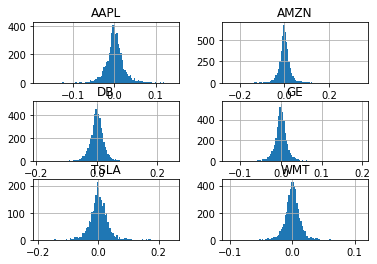

In [35]:
daily_return.hist(bins=100)

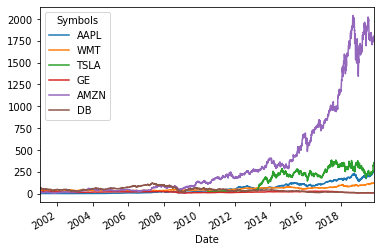

In [36]:
data.plot()

In [39]:
def cal_return(data):
    returns=np.log(data/data.shift(1))
    return returns

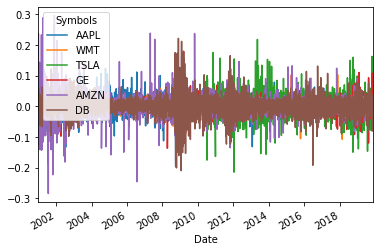

In [44]:
returns=cal_return(data)
returns.plot()

In [45]:
returns.mean()*252

Symbols
AAPL    0.299758
WMT     0.060952
TSLA    0.286594
GE     -0.037992
AMZN    0.256441
DB     -0.105493
dtype: float64

In [47]:
returns.cov()*252

Symbols,AAPL,WMT,TSLA,GE,AMZN,DB
Symbols,,,,,,
AAPL,0.131422,0.021745,0.032284,0.042747,0.064714,0.057236
WMT,0.021745,0.044372,0.011713,0.023997,0.025989,0.029846
TSLA,0.032284,0.011713,0.263454,0.028565,0.045568,0.045343
GE,0.042747,0.023997,0.028565,0.096290,0.047018,0.073382
AMZN,0.064714,0.025989,0.045568,0.047018,0.226769,0.061977
DB,0.057236,0.029846,0.045343,0.073382,0.061977,0.187783


In [51]:
def ini_weights():
    weights=np.random.random(len(stocks))
    weights /=np.sum(weights)
    return weights

In [52]:
def portfolio_return(returns,weights):
    port_return=np.sum(returns.mean()*weights)*252
    print("profit ",port_return)

In [58]:
w=ini_weights()

In [59]:
portfolio_return(returns,w)

profit  0.14991498756662042
